<a href="https://colab.research.google.com/github/RodaMuthoni/CO-Emissions-Estimator/blob/CEE-7-visualisation/visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

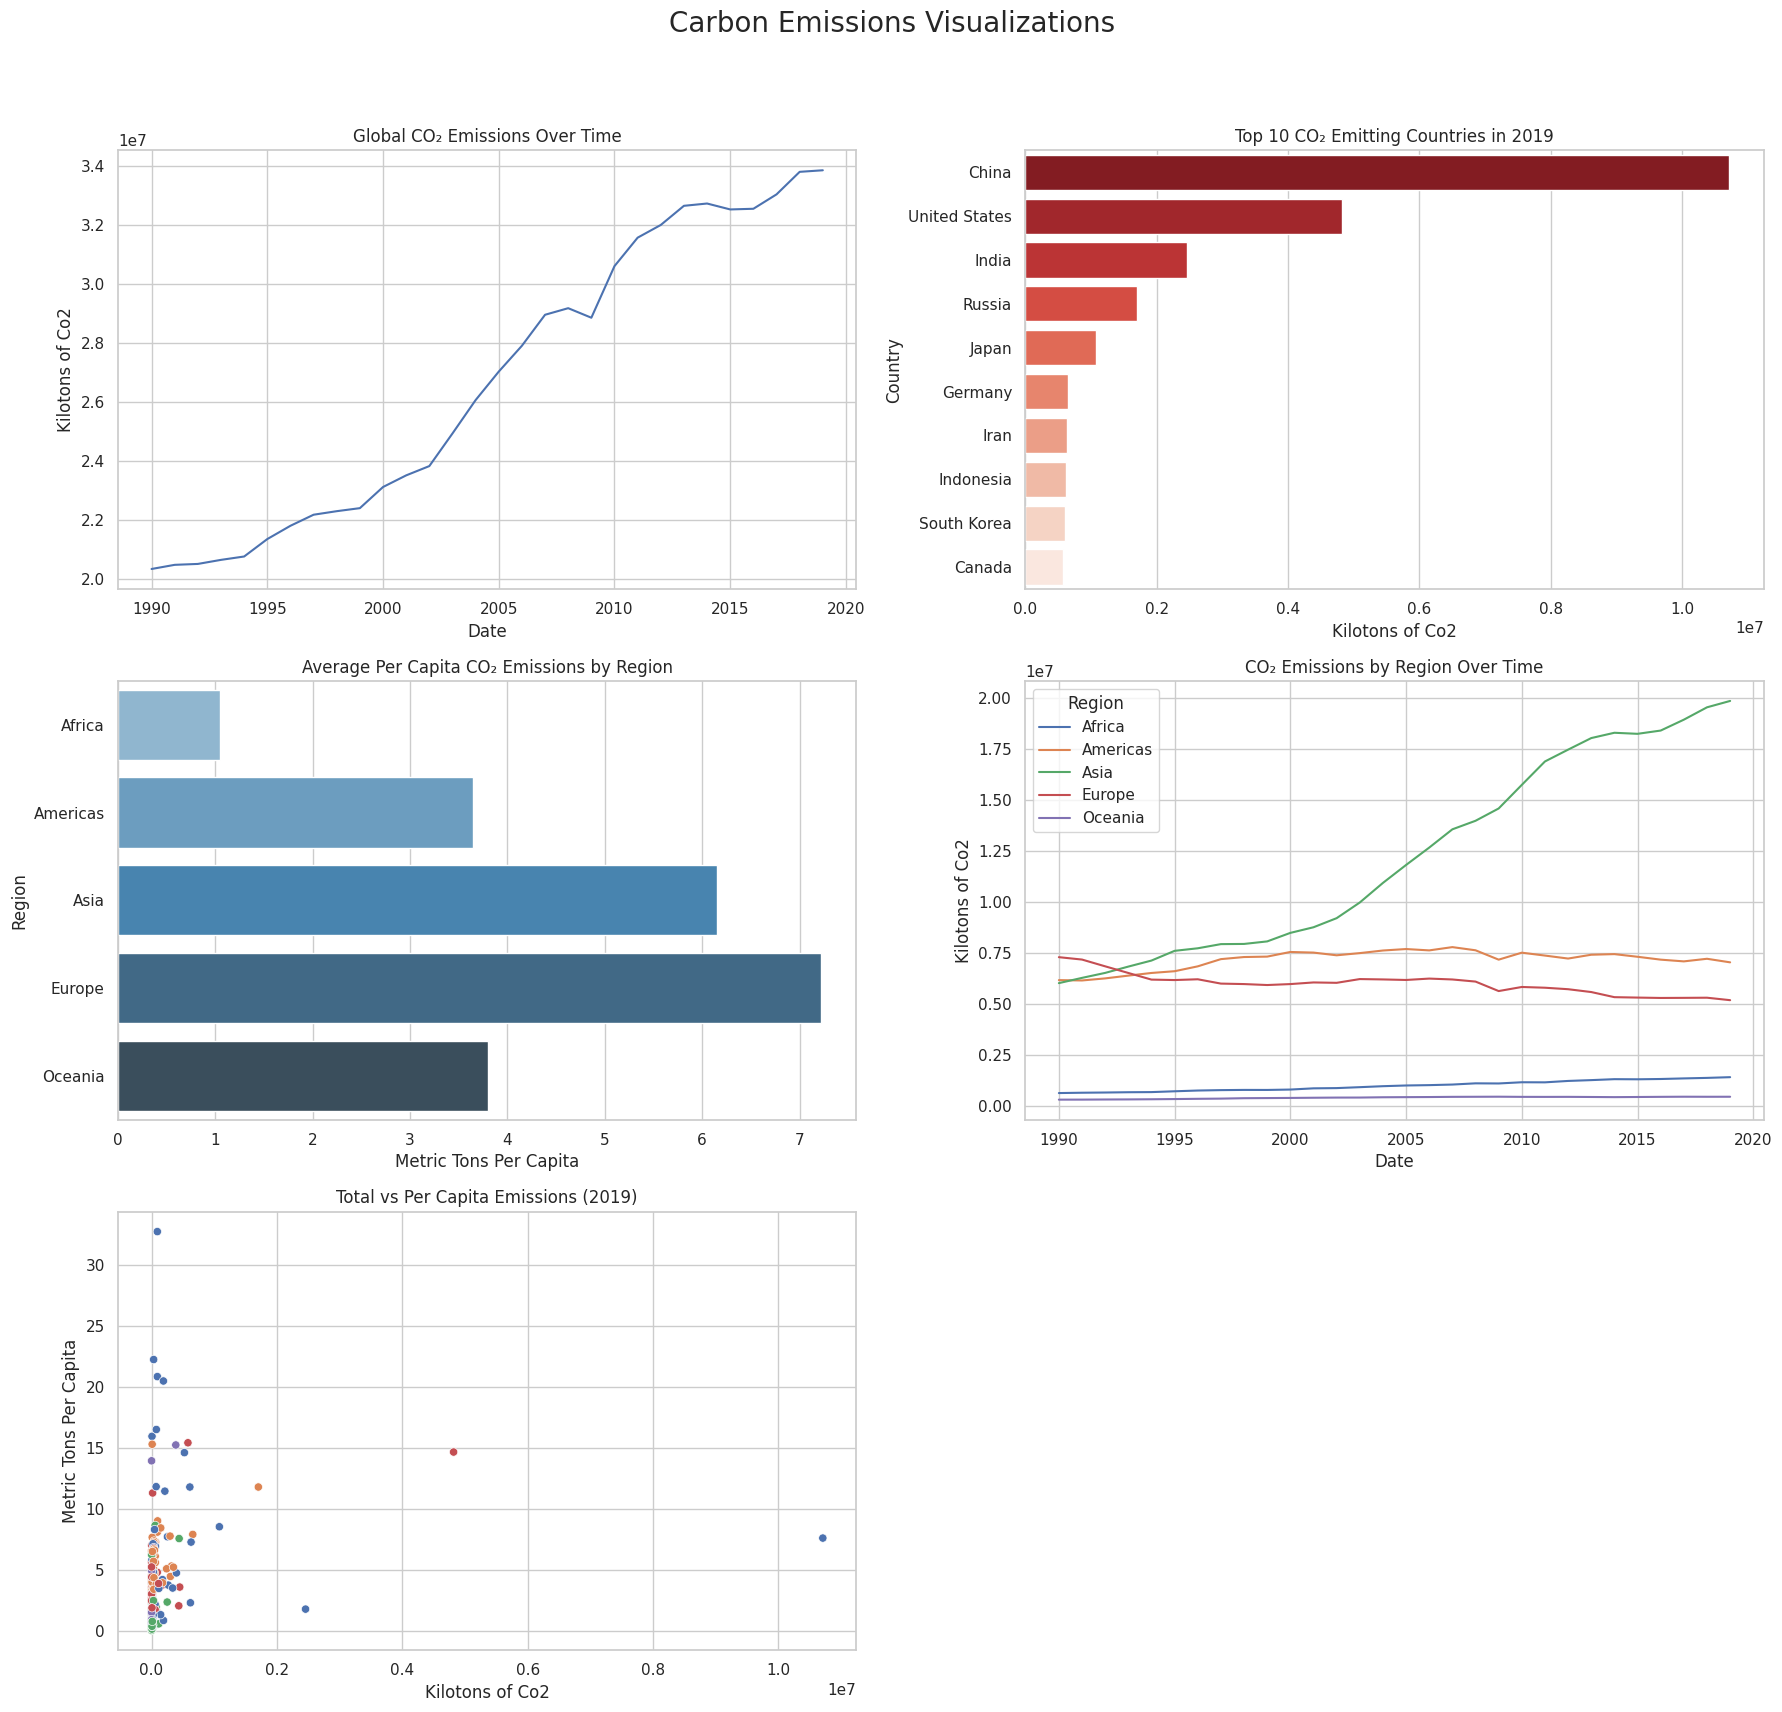

In [13]:
# Install required libraries (if not already installed)
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust path if needed)
file_path = "Carbon_(CO2)_Emissions_by_Country.csv"
df = pd.read_csv(file_path)

# Clean and preprocess
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
df['Kilotons of Co2'] = pd.to_numeric(df['Kilotons of Co2'], errors='coerce')
df['Metric Tons Per Capita'] = pd.to_numeric(df['Metric Tons Per Capita'], errors='coerce')
df = df.dropna(subset=['Date', 'Kilotons of Co2', 'Metric Tons Per Capita'])

# Set seaborn style
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle("Carbon Emissions Visualizations", fontsize=20)

# 1. Global CO2 Emissions Over Time
global_trend = df.groupby('Date')['Kilotons of Co2'].sum().reset_index()
sns.lineplot(data=global_trend, x='Date', y='Kilotons of Co2', ax=axs[0, 0])
axs[0, 0].set_title("Global CO₂ Emissions Over Time")

# 2. Top CO₂ Emitting Countries (latest year)
latest_year = df['Date'].max()
latest_data = df[df['Date'] == latest_year]
top_emitters = latest_data.sort_values('Kilotons of Co2', ascending=False).head(10)
sns.barplot(data=top_emitters, x='Kilotons of Co2', y='Country', ax=axs[0, 1], palette="Reds_r")
axs[0, 1].set_title(f"Top 10 CO₂ Emitting Countries in {latest_year}")

# 3. Per Capita Emissions by Region
region_per_capita = df.groupby('Region')['Metric Tons Per Capita'].mean().reset_index()
sns.barplot(data=region_per_capita, x='Metric Tons Per Capita', y='Region', ax=axs[1, 0], palette="Blues_d")
axs[1, 0].set_title("Average Per Capita CO₂ Emissions by Region")

# 4. CO₂ Emissions by Region Over Time
region_trends = df.groupby(['Date', 'Region'])['Kilotons of Co2'].sum().reset_index()
sns.lineplot(data=region_trends, x='Date', y='Kilotons of Co2', hue='Region', ax=axs[1, 1])
axs[1, 1].set_title("CO₂ Emissions by Region Over Time")

# 5. Scatter Plot: Total vs Per Capita Emissions
sns.scatterplot(data=latest_data, x='Kilotons of Co2', y='Metric Tons Per Capita',
                hue='Region', ax=axs[2, 0], legend=False)
axs[2, 0].set_title(f"Total vs Per Capita Emissions ({latest_year})")

# 6. Leave one plot empty
axs[2, 1].axis('off')

import warnings
warnings.filterwarnings("ignore")
# ...existing code...

# Final layout adjustments
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Saving cleaned_carbon_emissions.csv to cleaned_carbon_emissions (2).csv


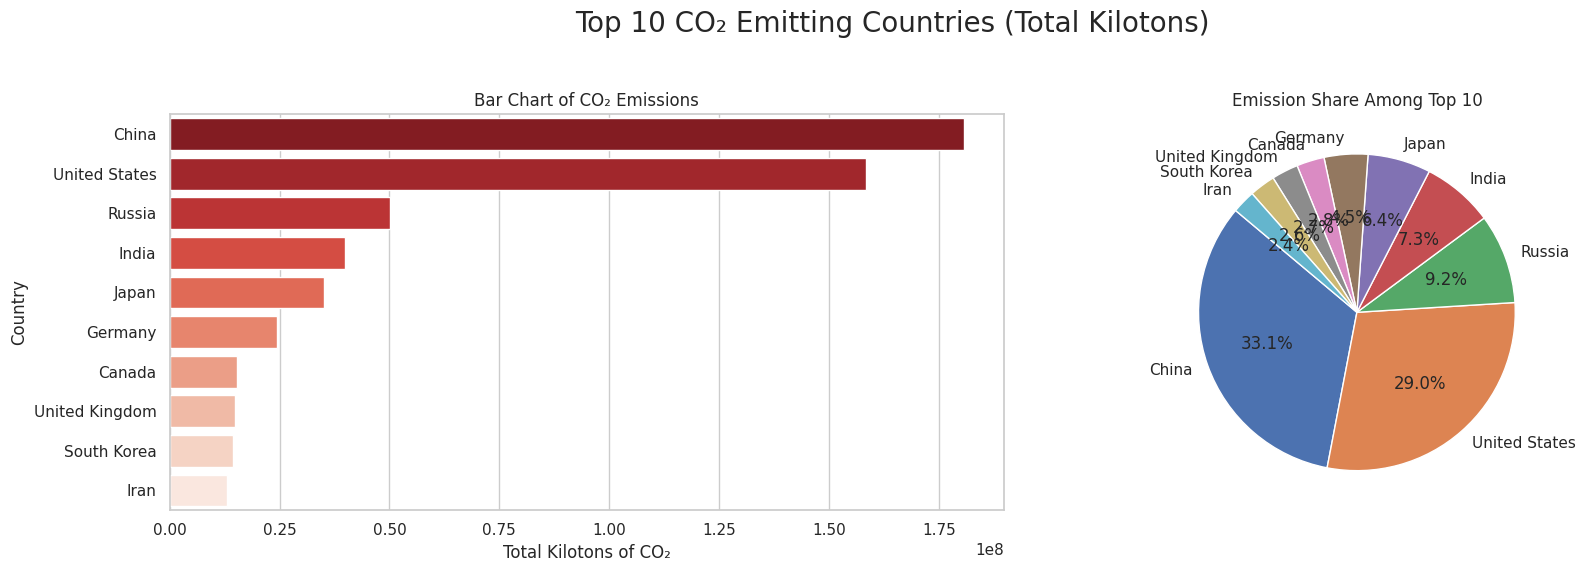

In [9]:
# STEP 1: Upload CSV
from google.colab import files
uploaded = files.upload()

# STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 3: Load and clean data
filename = next(iter(uploaded))  # Gets the uploaded filename
df = pd.read_csv(filename)

# Remove extra spaces and ensure numeric values
df.columns = df.columns.str.strip()
df['Kilotons of Co2'] = pd.to_numeric(df['Kilotons of Co2'], errors='coerce')
df.dropna(subset=['Kilotons of Co2'], inplace=True)

# STEP 4: Group by country to get total emissions
grouped_df = df.groupby('Country', as_index=False)['Kilotons of Co2'].sum()

# STEP 5: Get top 10 emitting countries
top_emitters = grouped_df.sort_values(by='Kilotons of Co2', ascending=False).head(10)

# STEP 6: Plotting
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle("Top 10 CO₂ Emitting Countries (Total Kilotons)", fontsize=20)

# Bar chart (fixed palette warning by using hue)
sns.barplot(
    data=top_emitters,
    x='Kilotons of Co2',
    y='Country',
    hue='Country',
    palette='Reds_r',
    legend=False,
    ax=axs[0]
)
axs[0].set_title("Bar Chart of CO₂ Emissions")
axs[0].set_xlabel("Total Kilotons of CO₂")
axs[0].set_ylabel("Country")

# Pie chart
axs[1].pie(
    top_emitters['Kilotons of Co2'],
    labels=top_emitters['Country'],
    autopct='%1.1f%%',
    startangle=140
)
axs[1].set_title("Emission Share Among Top 10")

# Layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


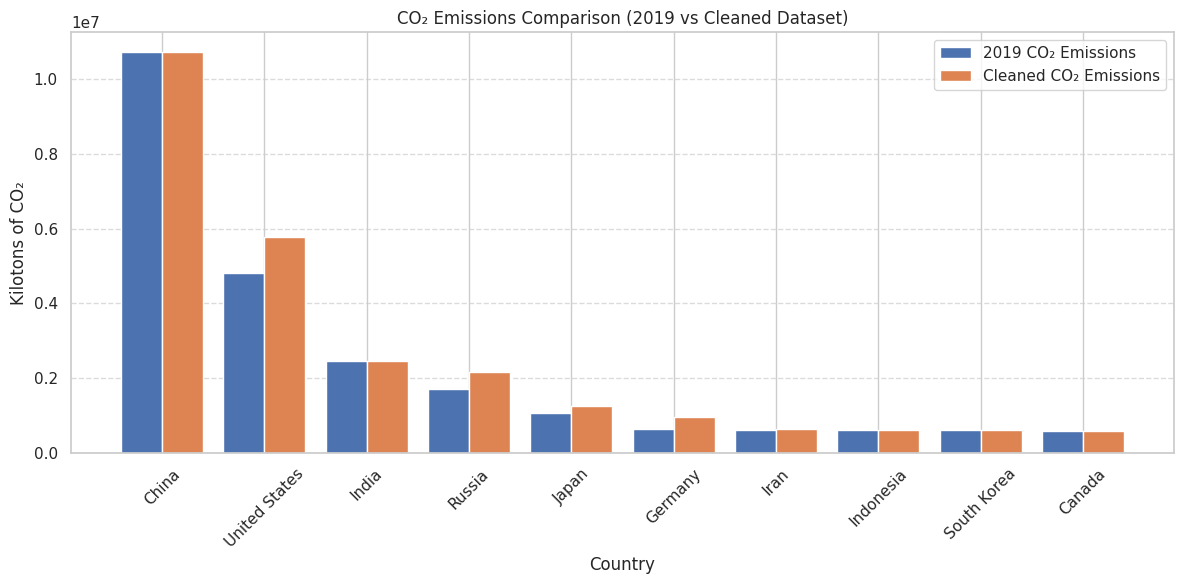

In [10]:
# STEP 1: Install & import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Upload files manually if needed
# from google.colab import files
# uploaded = files.upload()

# STEP 3: Load datasets
df_original = pd.read_csv('/content/Carbon_(CO2)_Emissions_by_Country.csv')
df_cleaned = pd.read_csv('/content/cleaned_carbon_emissions.csv')

# STEP 4: Filter for 2019 data
df_2019 = df_original[df_original['Date'].str.contains('2019', na=False)].copy()

# Drop duplicates just in case
df_cleaned_unique = df_cleaned.drop_duplicates(subset='Country')

# STEP 5: Merge datasets
merged_df = pd.merge(df_2019, df_cleaned_unique, on='Country', suffixes=('_2019', '_cleaned'))

# Optional: Sort by one of the CO2 columns
merged_df.sort_values(by='Kilotons of Co2_2019', ascending=False, inplace=True)

# STEP 6: Plot comparison for top 10 emitting countries
top_emitters = merged_df.head(10)

# Create plot
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(top_emitters))

# Bar 1: 2019 data
plt.bar(index, top_emitters['Kilotons of Co2_2019'], bar_width, label='2019 CO₂ Emissions')

# Bar 2: Cleaned dataset
plt.bar([i + bar_width for i in index], top_emitters['Kilotons of Co2_cleaned'], bar_width, label='Cleaned CO₂ Emissions')

# Labels and formatting
plt.xlabel('Country')
plt.ylabel('Kilotons of CO₂')
plt.title('CO₂ Emissions Comparison (2019 vs Cleaned Dataset)')
plt.xticks([i + bar_width/2 for i in index], top_emitters['Country'], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


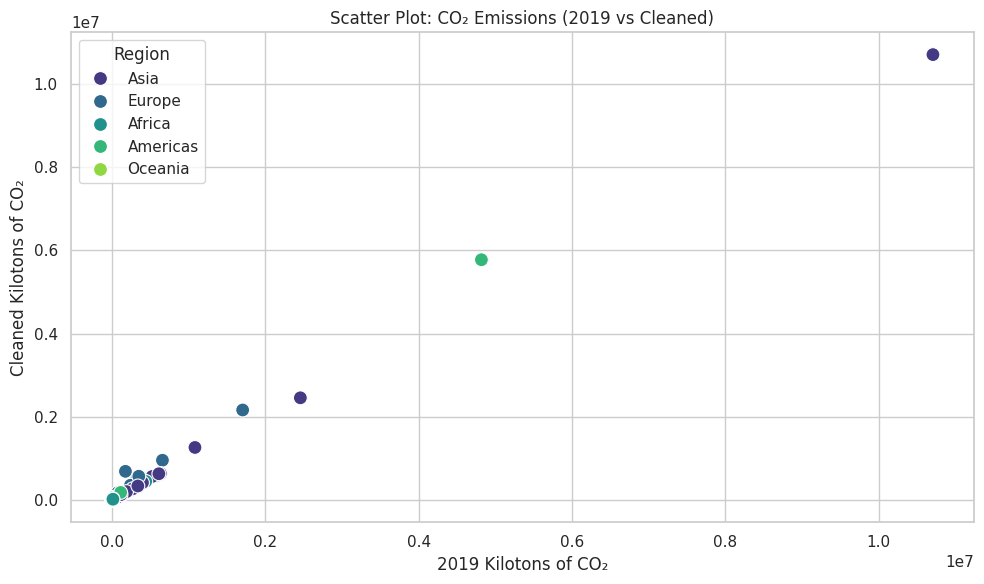

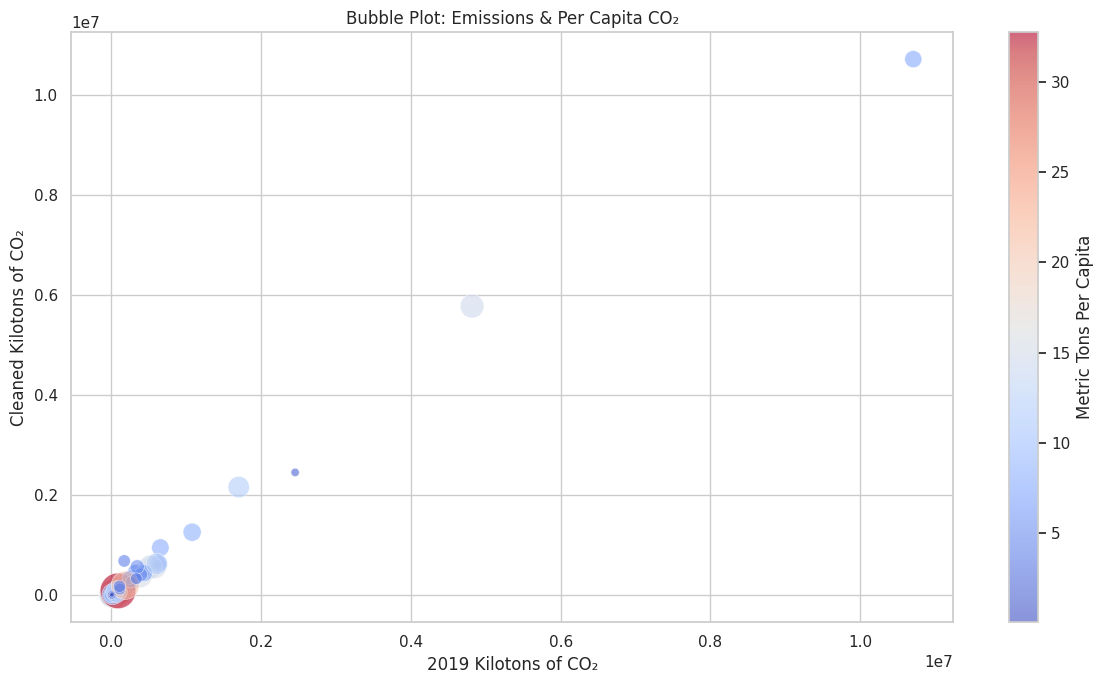

In [11]:
# --- Setup ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: install plotly if not already
!pip install --quiet plotly

# --- Load your datasets ---
df_original = pd.read_csv('/content/Carbon_(CO2)_Emissions_by_Country.csv')
df_cleaned = pd.read_csv('/content/cleaned_carbon_emissions.csv')

# --- Filter and merge ---
df_2019 = df_original[df_original['Date'].str.contains('2019', na=False)].copy()
df_cleaned_unique = df_cleaned.drop_duplicates(subset='Country')
merged_df = pd.merge(df_2019, df_cleaned_unique, on='Country', suffixes=('_2019', '_cleaned'))

# --- Handle missing values if any ---
merged_df.dropna(subset=['Kilotons of Co2_2019', 'Kilotons of Co2_cleaned'], inplace=True)

# --- Plot 1: Scatter Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='Kilotons of Co2_2019',
    y='Kilotons of Co2_cleaned',
    hue='Region' if 'Region' in merged_df.columns else None,
    s=100,
    palette='viridis'
)
plt.title('Scatter Plot: CO₂ Emissions (2019 vs Cleaned)')
plt.xlabel('2019 Kilotons of CO₂')
plt.ylabel('Cleaned Kilotons of CO₂')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Bubble Plot ---
plt.figure(figsize=(12, 7))
bubble = plt.scatter(
    merged_df['Kilotons of Co2_2019'],
    merged_df['Kilotons of Co2_cleaned'],
    s=merged_df['Metric Tons Per Capita'] * 20,
    c=merged_df['Metric Tons Per Capita'],
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='w',
    linewidths=0.5
)
plt.colorbar(label='Metric Tons Per Capita')
plt.xlabel('2019 Kilotons of CO₂')
plt.ylabel('Cleaned Kilotons of CO₂')
plt.title('Bubble Plot: Emissions & Per Capita CO₂')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 3: Plotly Interactive Scatter ---
fig = px.scatter(
    merged_df,
    x='Kilotons of Co2_2019',
    y='Kilotons of Co2_cleaned',
    size='Metric Tons Per Capita',
    color='Region' if 'Region' in merged_df.columns else None,
    hover_name='Country',
    size_max=40,
    title='Interactive CO₂ Emissions Comparison (2019 vs Cleaned)',
    labels={
        'Kilotons of Co2_2019': '2019 Emissions (kt)',
        'Kilotons of Co2_cleaned': 'Cleaned Emissions (kt)'
    }
)
fig.show()


In [12]:
import warnings
warnings.filterwarnings("ignore")
# ...existing code...